In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("Mall_Customers.csv")
print(f"shape={df.shape}\nSize={df.size}")

shape=(200, 5)
Size=1000


**we have 200 rows and 5 featurs**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**after using info method from pandas library  we have four integer and 1 object data type**

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**there is no null value in my dataset**

In [ ]:
df.duplicated().sum()

0

**in my dataset i have no duplicated rows**

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
skewness={}
for i in df.drop(["Gender"],axis=1).columns:
  s=df[i].skew()
  skewness[i]=s
features=[]
val=[]
skew_type=[]
for key,value in skewness.items():
  features.append(key)
  val.append(value)
  t=0
  if value>0.5:
    t=1
  if value<-0.5:
    t=2
  if t==0:
    ty="Normal"
  if t==1:
    ty="positively skewed"
  if t==2:
    ty="Ngetive skewed"
  skew_type.append(ty)
skewed_df=pd.DataFrame({"features":features,"value":val,"skewness":skew_type})
skewed_df



,features,value,skewness
0,CustomerID,0.000000,Normal
1,Age,0.485569,Normal
2,Annual Income (k$),0.321843,Normal
3,Spending Score (1-100),-0.047220,Normal


**all features are normaly skewed here**

<Axes: >

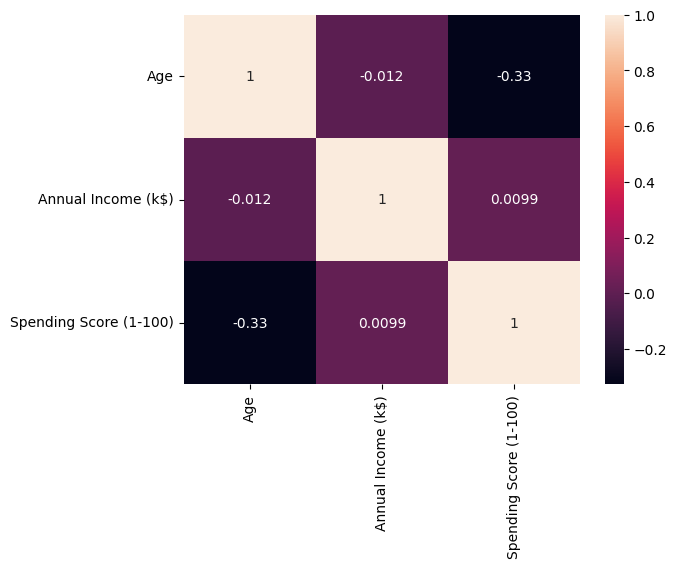

In [ ]:
df_num=df.select_dtypes(include="number").drop(["CustomerID"],axis=1)
cor=df_num.corr()
sns.heatmap(cor,annot=True)

**there is no high multicolinearty in between featurs**

**age and spending score are negative correlated that means**

younger people are spending more on shopping entertainment etc than older peaple

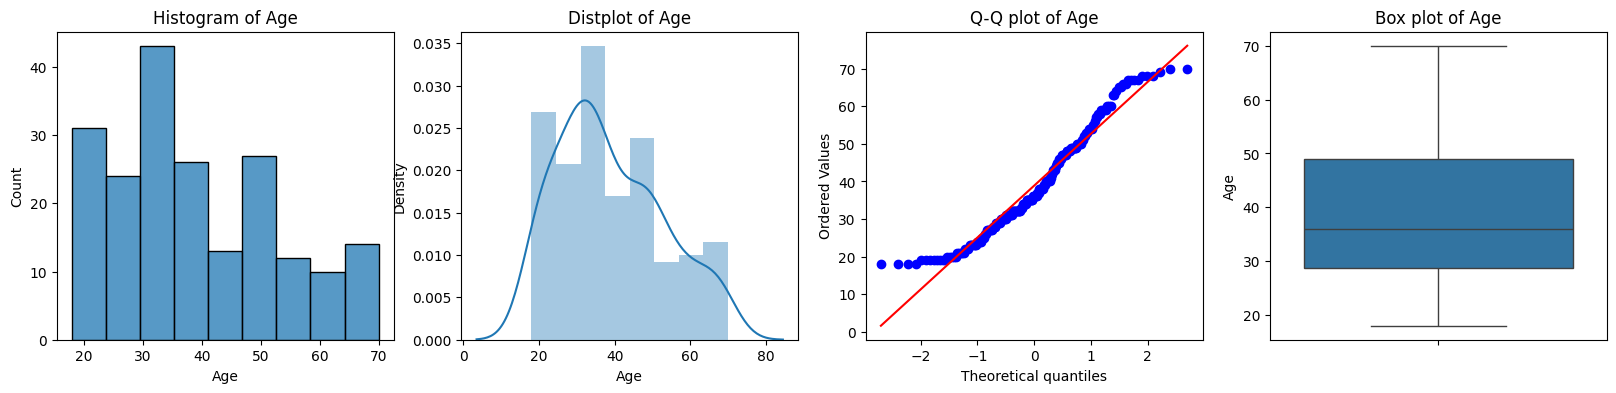

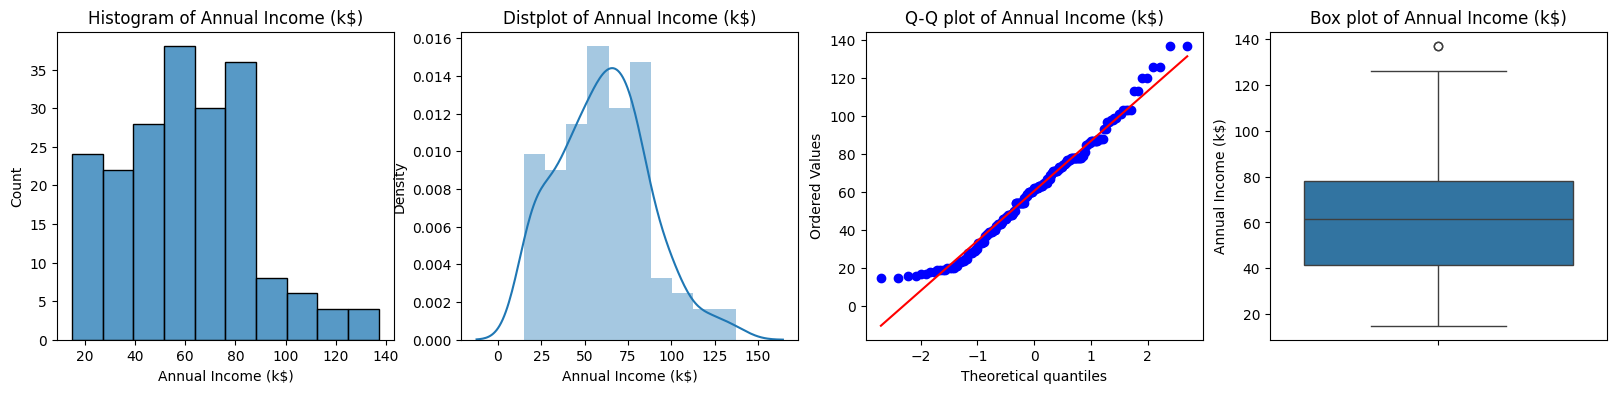

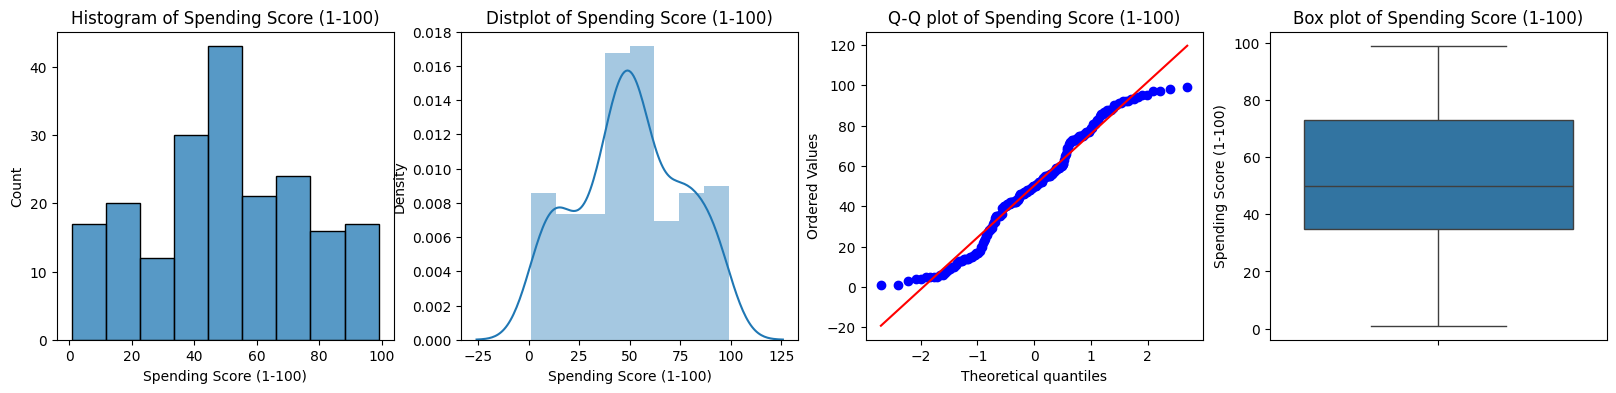

In [ ]:
for i in df_num:
  plt.figure(figsize=(20,4))
  plt.subplot(141)
  sns.histplot(df[i])
  plt.title(f"Histogram of {i}")

  plt.subplot(142)
  sns.distplot(df[i])
  plt.title(f"Distplot of {i}")

  plt.subplot(143)
  sts.probplot(df[i],plot=plt)
  plt.title(f"Q-Q plot of {i}")

  plt.subplot(144)
  sns.boxplot(df[i])
  plt.title(f"Box plot of {i}")

**in this dataset i see that :**

**all feature are normally distributes**

**there are some outlier in our feature "annual income"**

In [ ]:
"""for i in df_num.columns:
  print(f"The Skewness of {i} is {round(df[i].skew(),3)}")"""

'for i in df_num.columns:\n  print(f"The Skewness of {i} is {round(df[i].skew(),3)}")'

<Axes: ylabel='count'>

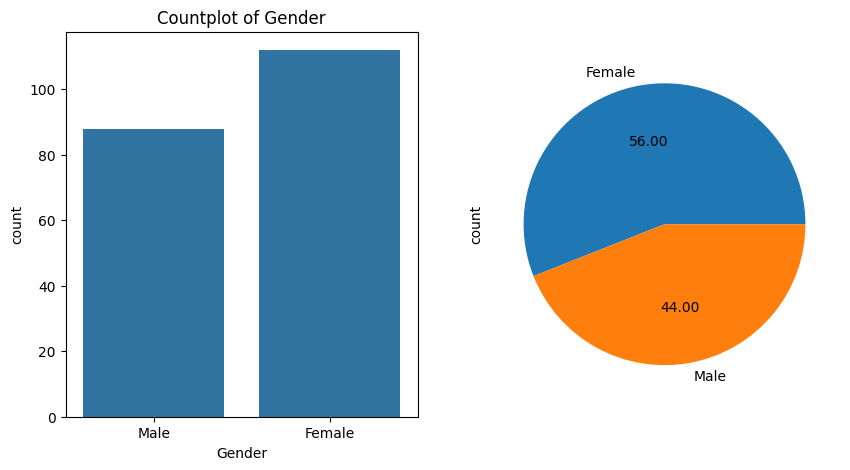

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
_=sns.countplot(df,x="Gender")
plt.title("Countplot of Gender")

plt.subplot(122)
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")

**there are more number of female than male in my dataset**

In [ ]:
from re import I
def remove_outlier(df,i):
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_lim=Q1-1.5*IQR
  upper_lim=Q3+1.5*IQR
  df=df[(df[i]>=lower_lim) & (df[i]<=upper_lim)]
  df.reset_index(drop=True,inplace=True)
  return df

df_filt=remove_outlier(df,"Annual Income (k$)")

<Axes: >

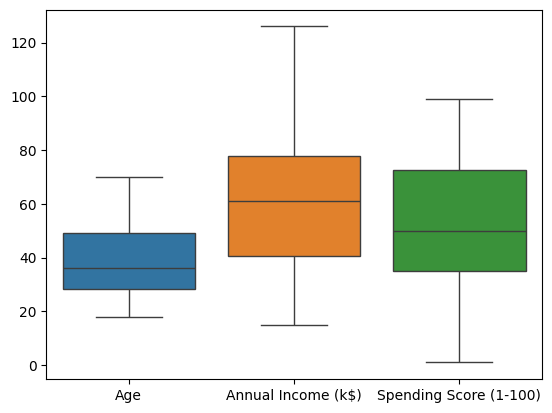

In [ ]:
sns.boxplot(df_filt.drop([df.columns[0]],axis=1))

**outlier are removed from our feature"annual income"**

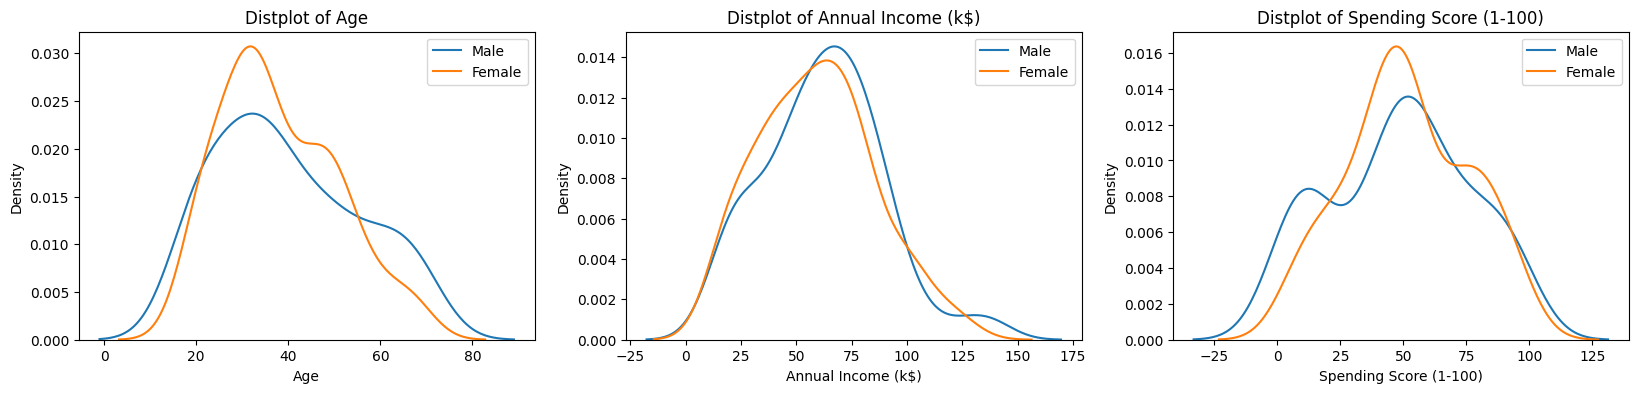

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.distplot(df[df["Gender"]=="Male"]["Age"],hist=False,label="Male")
sns.distplot(df[df["Gender"]=="Female"]["Age"],hist=False,label="Female")
plt.title("Distplot of Age")
plt.legend()

plt.subplot(132)
sns.distplot(df[df["Gender"]=="Male"]["Annual Income (k$)"],hist=False,label="Male")
sns.distplot(df[df["Gender"]=="Female"]["Annual Income (k$)"],hist=False,label="Female")
plt.title("Distplot of Annual Income (k$)")
plt.legend()

plt.subplot(133)
sns.distplot(df[df["Gender"]=="Male"]["Spending Score (1-100)"],hist=False,label="Male")
sns.distplot(df[df["Gender"]=="Female"]["Spending Score (1-100)"],hist=False,label="Female")
plt.title("Distplot of Spending Score (1-100)")
plt.legend()

* **the individual with younger age are female and older age are more likly to be male**
* **the people have higher income are more likly to be male**
* **the people with spending score between 25 and 50 are more likely to be female that means the average spenders are female that means if company focuses on spenders should be female**



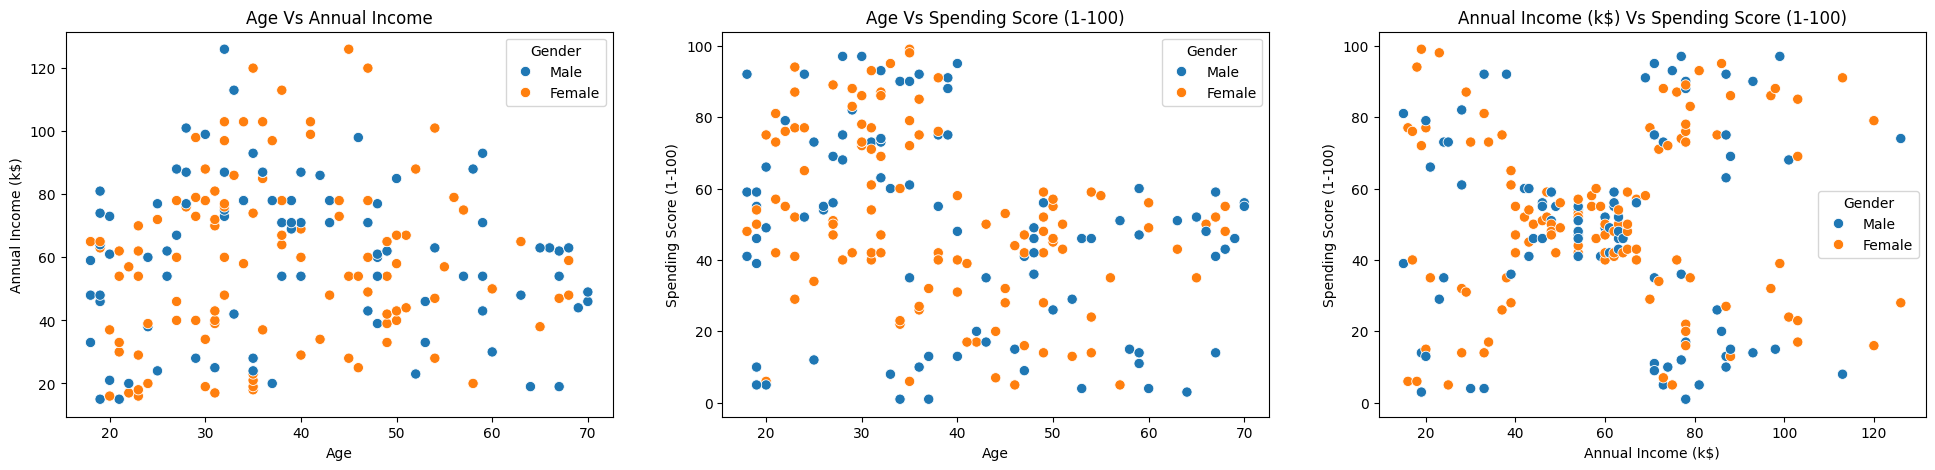

In [ ]:
plt.figure(figsize=(24,5))
plt.subplot(131)
_=sns.scatterplot(x="Age",y="Annual Income (k$)",data=df_filt,s=55,hue="Gender")
_=plt.title("Age Vs Annual Income")

plt.subplot(132)
_=sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df_filt,s=55,hue="Gender")
_=plt.title("Age Vs Spending Score (1-100)")

plt.subplot(133)
_=sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df_filt,s=55,hue="Gender")
_=plt.title("Annual Income (k$) Vs Spending Score (1-100)")

**From the above scatter plot we can see the most appropriate features for clustering is Annual income and Spending Score.**

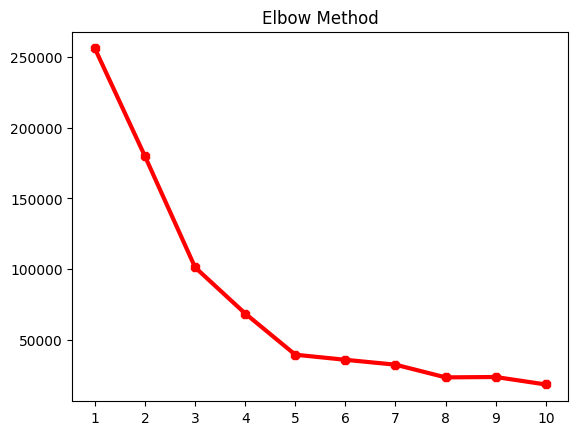

In [ ]:
X1=df_filt[["Annual Income (k$)","Spending Score (1-100)"]]
from sklearn.cluster import KMeans
sse=[]
k_range=range(1,11)
for i in k_range:
  km=KMeans(n_clusters=i)
  km.fit_predict(X1)
  sse.append(km.inertia_)

plt.plot(k_range,sse,linewidth=3,color="red",marker="8")
_=plt.xticks(np.arange(1,11))
_=plt.title("Elbow Method")

**By Using elbow method, We have choosen the value of K to be 5**

In [ ]:
km1=KMeans(n_clusters=5)
Label_1=pd.DataFrame(km1.fit_predict(X1),columns=["Lables"])
df_labled_1=pd.concat([df_filt,Label_1],axis=1)

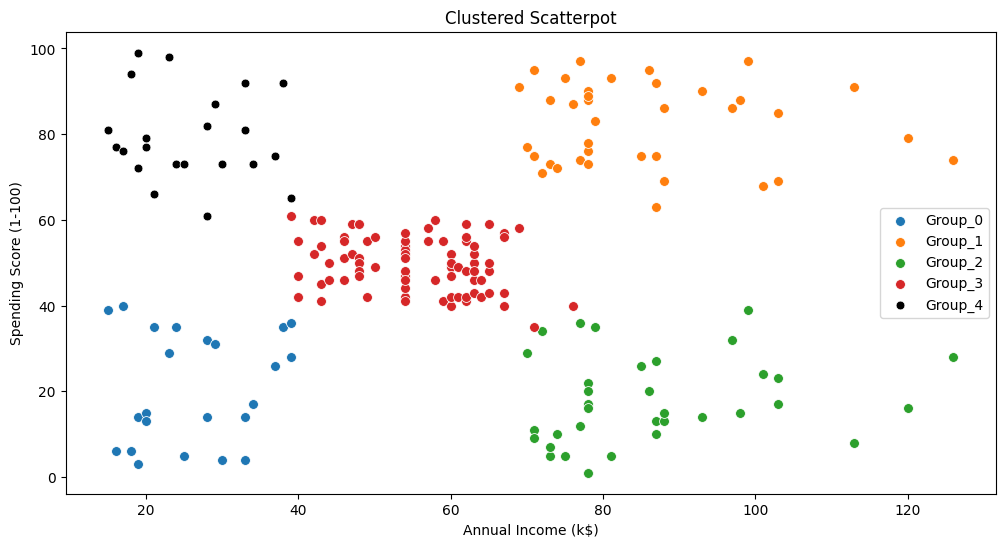

In [ ]:
df_1=df_labled_1[(df_labled_1["Lables"]==0)]
df_2=df_labled_1[(df_labled_1["Lables"]==1)]
df_3=df_labled_1[(df_labled_1["Lables"]==2)]
df_4=df_labled_1[(df_labled_1["Lables"]==3)]
df_5=df_labled_1[(df_labled_1["Lables"]==4)]

plt.figure(figsize=(12,6))
sns.scatterplot(data=df_1,x="Annual Income (k$)",y="Spending Score (1-100)",label="Group_0",s=50)
sns.scatterplot(data=df_2,x="Annual Income (k$)",y="Spending Score (1-100)",label="Group_1",s=50)
sns.scatterplot(data=df_3,x="Annual Income (k$)",y="Spending Score (1-100)",label="Group_2",s=50)
sns.scatterplot(data=df_4,x="Annual Income (k$)",y="Spending Score (1-100)",label="Group_3",s=50)
_=sns.scatterplot(data=df_5,x="Annual Income (k$)",y="Spending Score (1-100)",label="Group_4",color="black",s=40)
_=plt.title("Clustered Scatterpot")

i divided the costomer into five group on the basis of spending score and annual income and observe that:

**Group_0:**annual income (0-40) and spending score(0-40)-**low Annual income and Low spending score group**

**Group_1:**annual income (70-120) and spending score(60-100)-**High Annual income and High spending score group**

**Group_2:**annual income (70-120) and spending score(0-40)-**High Annual income and Low spending score group**

**Group_3:**annual income (40-70) and spending score(40-60)- **Moderate Annual income and Moderate spending score group**

**Group_4:**annual income (0-40) and spending score(60-100)-**Low Annual income and High spending scoregroup**



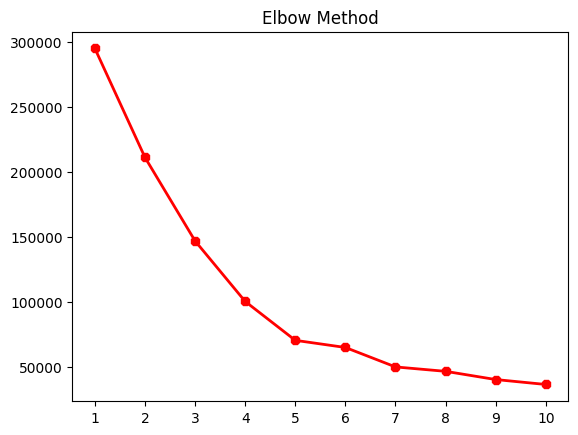

In [ ]:
X2=df_filt[["Age","Annual Income (k$)","Spending Score (1-100)"]]
k_range1=range(1,11)
sse1=[]
for i in k_range1:
  km1=KMeans(n_clusters=i)
  km1.fit_predict(X2)
  sse1.append(km1.inertia_)

plt.plot(k_range,sse1,marker="8",linewidth=2,color="red")
_=plt.xticks(np.arange(1,11))
_=plt.title("Elbow Method")

**Taking Age, Annual income and spending score we have calculated the value of K which seems to be 6**

In [ ]:
km2=KMeans(n_clusters=6)
labled_2=pd.DataFrame(km2.fit_predict(X2),columns=["Lables"])
df_labled_2=pd.concat([df_filt,labled_2],axis=1)
df_labled_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Lables
0,1,Male,19,15,39,1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,1
3,4,Female,23,16,77,5
4,5,Female,31,17,40,1


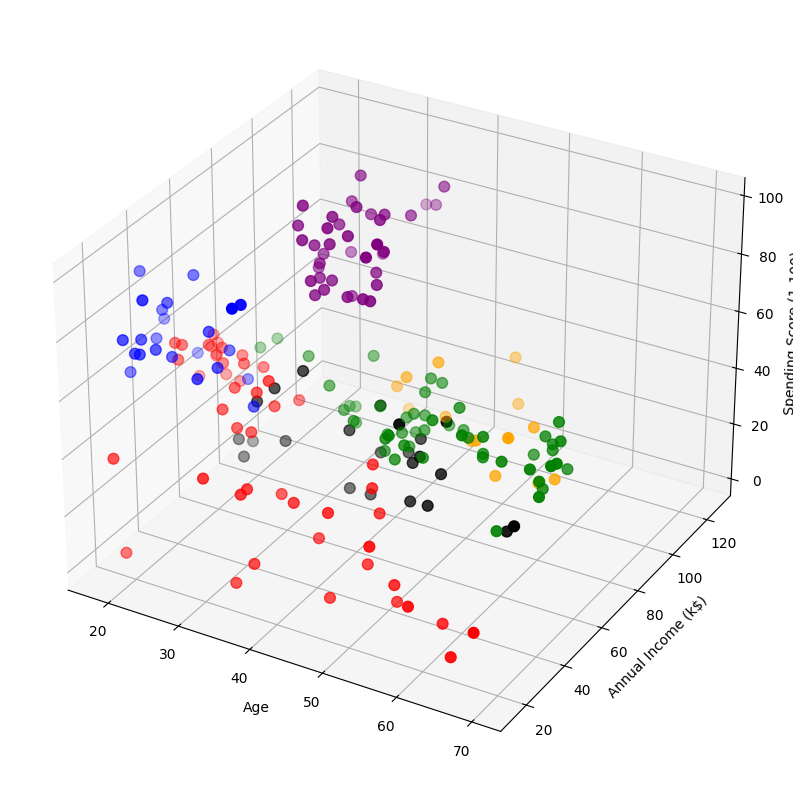

In [ ]:
df_6=df_labled_2[(df_labled_2["Lables"]==0)]
df_7=df_labled_2[(df_labled_2["Lables"]==1)]
df_8=df_labled_2[(df_labled_2["Lables"]==2)]
df_9=df_labled_2[(df_labled_2["Lables"]==3)]
df_10=df_labled_2[(df_labled_2["Lables"]==4)]
df_11=df_labled_2[(df_labled_2["Lables"]==5)]

fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_6["Age"],df_6["Annual Income (k$)"],df_6["Spending Score (1-100)"],c='purple', s=60)
ax.scatter(df_7["Age"],df_7["Annual Income (k$)"],df_7["Spending Score (1-100)"],c='red', s=60)
ax.scatter(df_8["Age"],df_8["Annual Income (k$)"],df_8["Spending Score (1-100)"],c='black', s=60)
ax.scatter(df_9["Age"],df_9["Annual Income (k$)"],df_9["Spending Score (1-100)"],c='green', s=60)
ax.scatter(df_10["Age"],df_10["Annual Income (k$)"],df_10["Spending Score (1-100)"],c='orange', s=60)
ax.scatter(df_11["Age"],df_11["Annual Income (k$)"],df_11["Spending Score (1-100)"],c='blue', s=60)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
print(f"The number of customers in 1st group are {len(df_6)}")
print(f'Those are: {df_6["CustomerID"].values}')
print()
print(f"The number of customers in 2nd group are {len(df_7)}")
print(f'Those are: {df_7["CustomerID"].values}')
print()
print(f"The number of customers in 3rd group are {len(df_8)}")
print(f'Those are: {df_8["CustomerID"].values}')
print()
print(f"The number of customers in 4th group are {len(df_9)}")
print(f'Those are: {df_9["CustomerID"].values}')
print()
print(f"The number of customers in 5th group are {len(df_10)}")
print(f'Those are: {df_10["CustomerID"].values}')
print()
print(f"The number of customers in 6th group are {len(df_11)}")
print(f'Those are: {df_11["CustomerID"].values}')


The number of customers in 1st group are 38
Those are: [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198]

The number of customers in 2nd group are 48
Those are: [  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  43  45  48  49  50  52  53  56  59  62  66  69  70  76  79  85
  88  92  95  96  98 100 101 106 112 114 115 116]

The number of customers in 3rd group are 23
Those are: [125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159
 163 167 169 171 173]

The number of customers in 4th group are 52
Those are: [ 41  47  51  54  55  57  58  60  61  63  64  65  67  68  71  72  73  74
  75  77  78  80  81  82  83  84  86  87  89  90  91  93  94  97  99 102
 103 104 105 107 108 109 110 111 113 117 118 119 120 121 122 123]

The number of customers in 5th group are 14
Those are: [161 165 175 177 179 181 183 185 187 189 191 193 195 197]

The